# Gaussian Mixture Models
#### Math 3480 - Machine Learning - Dr. Michael E. Olson

## Reading
* Geron, Chapter 9

### Additional Resources
* [YouTube: Serrano Academy - Gaussian Mixture Models](https://www.youtube.com/watch?v=q71Niz856KE&t=630s)
  * Review: [YouTube: Serrano Academy - The Covariance Matrix](https://www.youtube.com/watch?v=WBlnwvjfMtQ)

## Theory

### Hard Clustering vs. Soft Clustering

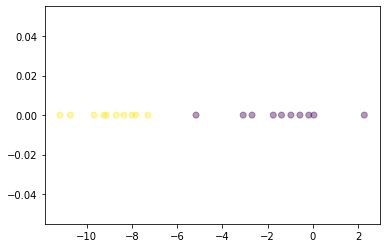

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20, n_features=1, centers=2, cluster_std=1.8,random_state=40)

plt.scatter(X,np.zeros_like(X),c=y,alpha=0.4)

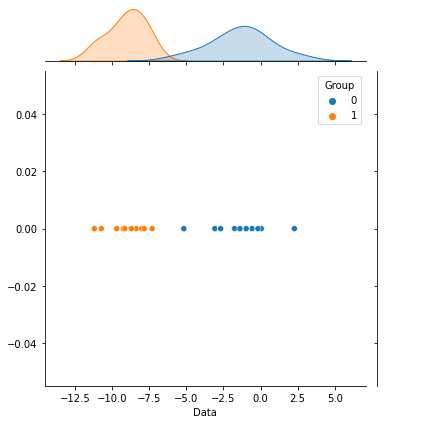

In [3]:
X_df = pd.DataFrame(X,columns=['Data'])
X_df['Group'] = pd.DataFrame(y)
sns.jointplot(data=X_df, x='Data', y=0, hue='Group')

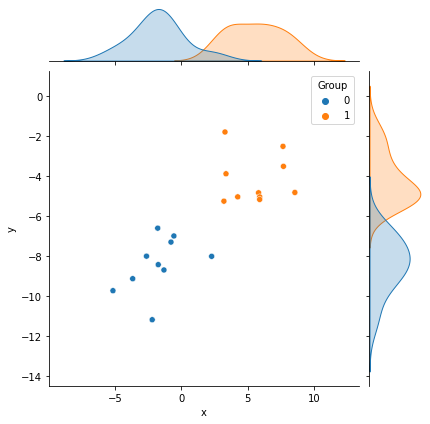

In [6]:
X, y = make_blobs(n_samples=20, n_features=2, centers=2, cluster_std=1.8,random_state=40)
X_df = pd.DataFrame(X,columns=['x','y'])
X_df['Group'] = pd.DataFrame(y)
sns.jointplot(data=X_df, x='x', y='y', hue='Group')

## Algorithm

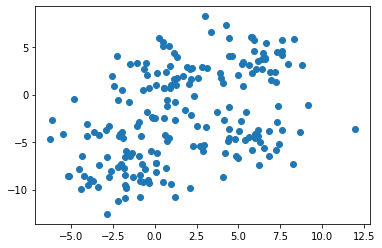

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=5, cluster_std=1.8,random_state=40)
plt.scatter(X[:,0],X[:,1])

In [9]:
k = 5   # Number of Clusters

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=k, n_init=10)
y_predict = gmm.fit_predict(X)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,y_predict))

[[ 0  0  0 40  0]
 [39  1  0  0  0]
 [ 1 26  5  8  0]
 [ 0  0 39  0  1]
 [ 1  0  4  0 35]]


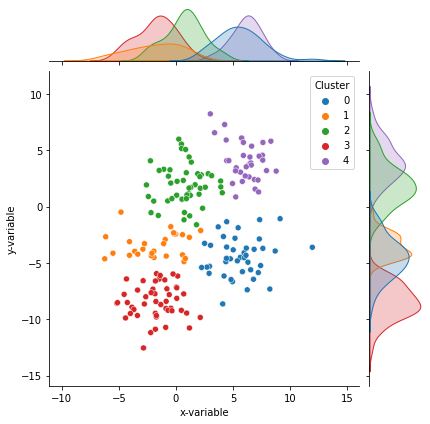

In [11]:
#dataset = pd.DataFrame([X,y_predict], columns=['A','B','Cluster'])
dataset = pd.DataFrame(X, columns=['x-variable','y-variable'])
dataset['Cluster'] = y_predict
sns.jointplot(data=dataset,x='x-variable',y='y-variable',hue='Cluster', palette='tab10')

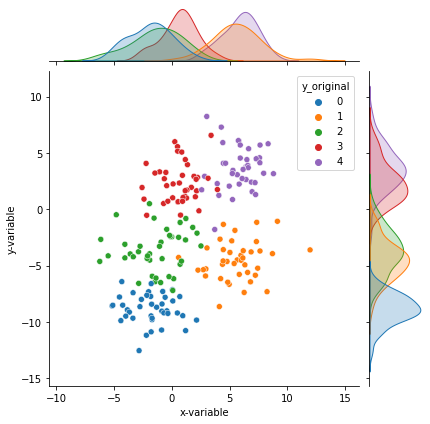

In [12]:
dataset['y_original'] = y
sns.jointplot(data=dataset,x='x-variable',y='y-variable',hue='y_original', palette='tab10')

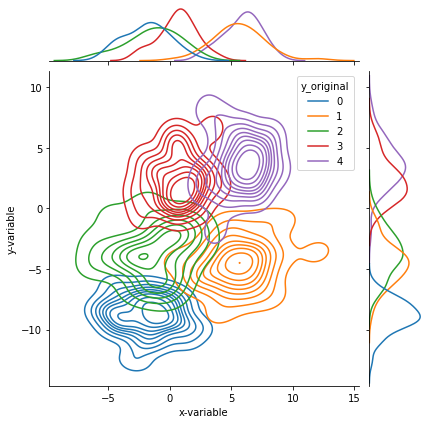

In [26]:
dataset['y_original'] = y
sns.jointplot(data=dataset,x='x-variable',y='y-variable', kind='kde', hue='y_original', palette='tab10')

<AxesSubplot:xlabel='x-variable', ylabel='y-variable'>

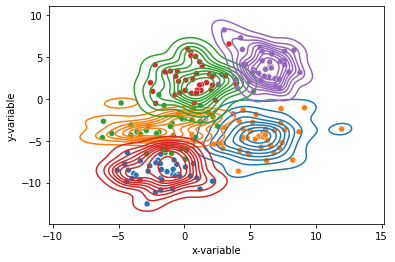

In [25]:
fig, ax = plt.subplots()
sns.kdeplot(data=dataset,x='x-variable',y='y-variable',hue='Cluster', palette='tab10', ax=ax, legend=False)
sns.scatterplot(data=dataset,x='x-variable',y='y-variable',hue='y_original', palette='tab10', ax=ax, legend=False)